In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile as zf

files = zf.ZipFile("/content/drive/MyDrive/archive.zip",'r')
files.extractall("/content/dataset")
files.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [6]:
data = []
labels = []
classes = 43
cur_path = "/content/dataset"
for i in range(classes):
    path = os. path.join(cur_path,'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
data = np.array(data)
labels = np.array(labels)

In [7]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

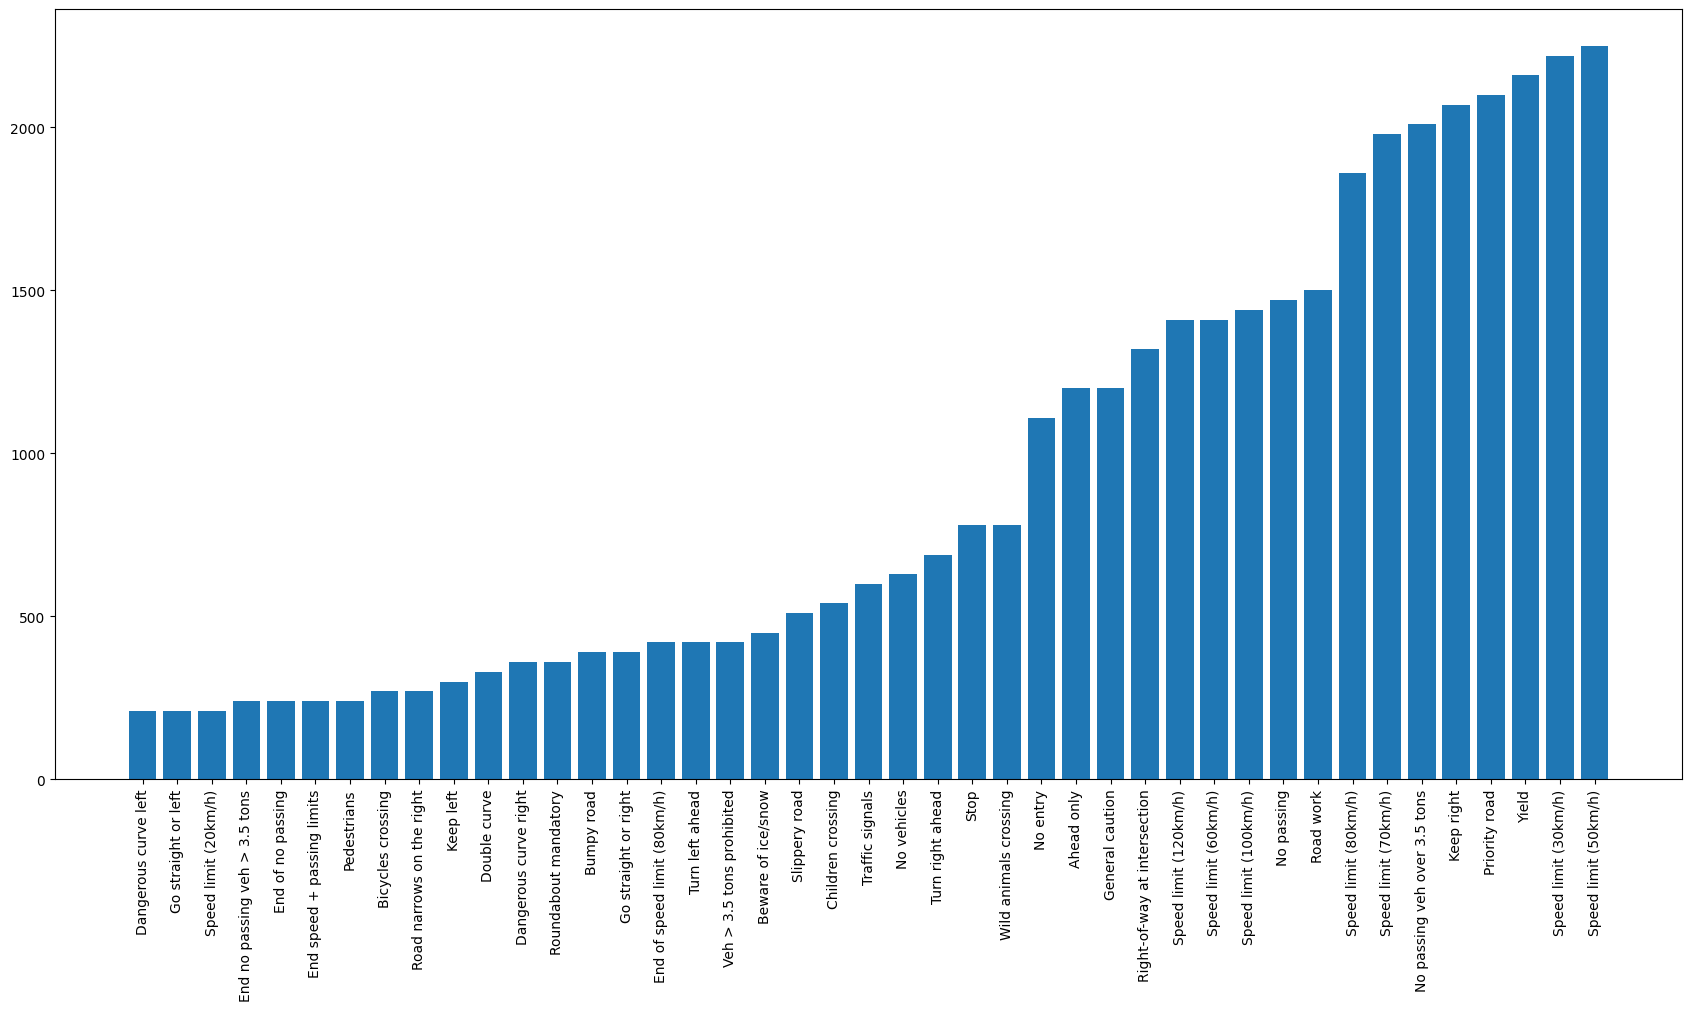

In [8]:
train_path=os.path.join(cur_path,'train')
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

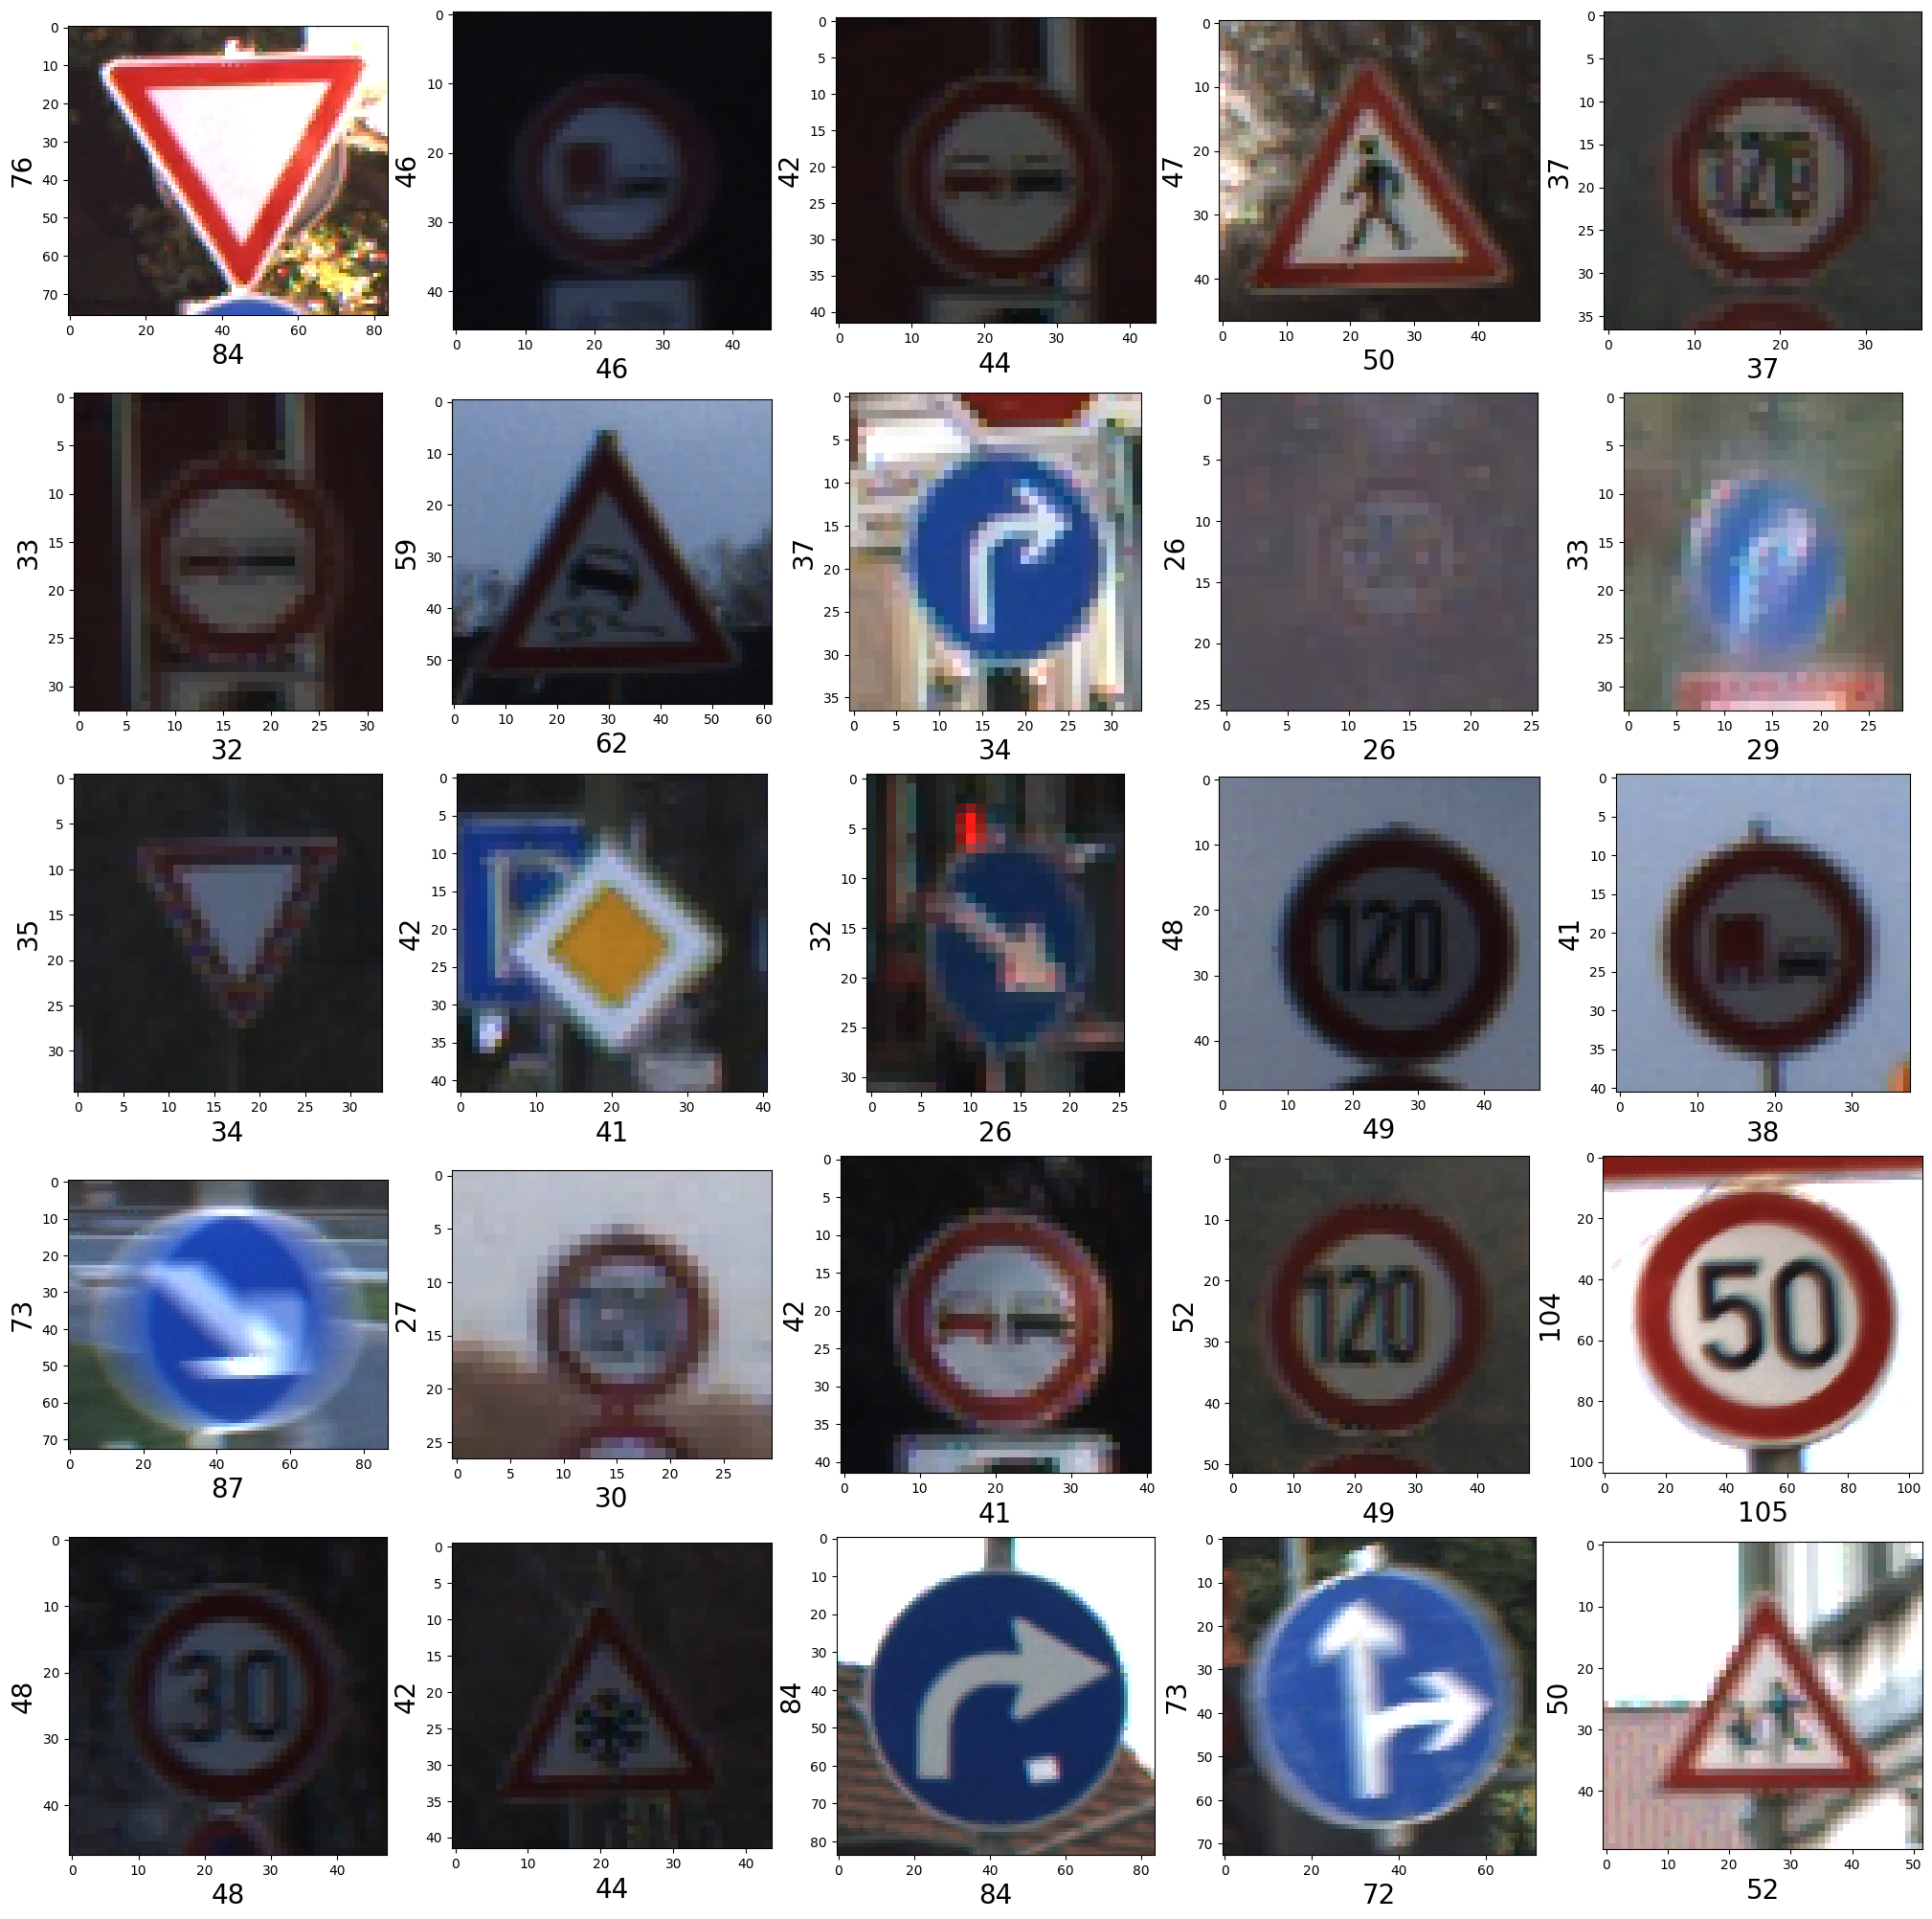

In [9]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(cur_path + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = cur_path + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=0)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [10]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

(39209, 32, 32, 3) (39209,)
X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [11]:
#Building the model - CNN

#Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, 5x5 kernel size, and ReLU activation
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

# Add another convolutional layer with 32 filters, 5x5 kernel size, and ReLU activation
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(rate=0.25))

# Add more convolutional and pooling layers, followed by dropout
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add the output layer with 43 units (corresponding to the number of classes) and softmax activatio
model.add(Dense(43, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [13]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
eps = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/15
981/981 [==============================] - 21s 6ms/step - loss: 1.5585 - accuracy: 0.6042 - val_loss: 0.1864 - val_accuracy: 0.9503
Epoch 2/15
981/981 [==============================] - 8s 8ms/step - loss: 0.3739 - accuracy: 0.8943 - val_loss: 0.0948 - val_accuracy: 0.9762
Epoch 3/15
981/981 [==============================] - 6s 6ms/step - loss: 0.2667 - accuracy: 0.9277 - val_loss: 0.0603 - val_accuracy: 0.9855
Epoch 4/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2347 - accuracy: 0.9366 - val_loss: 0.0418 - val_accuracy: 0.9895
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.1960 - accuracy: 0.9494 - val_loss: 0.0467 - val_accuracy: 0.9895
Epoch 6/15
981/981 [==============================] - 6s 6ms/step - loss: 0.1773 - accuracy: 0.9554 - val_loss: 0.0327 - val_accuracy: 0.9912
Epoch 7/15
981/981 [==============================] - 8s 8ms/step - loss: 0.2069 - accuracy: 0.9492 - val_loss: 0.0467 - val_accuracy: 0.9889
Epoch

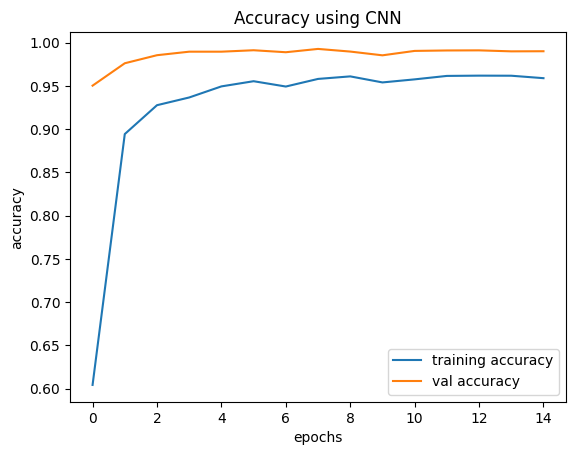

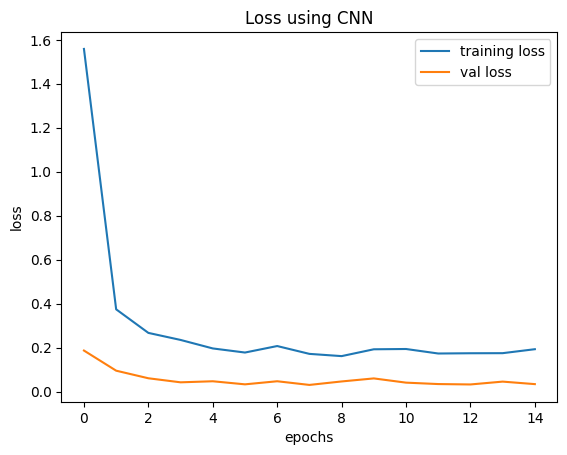

In [15]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy using CNN')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss using CNN')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
y_test = pd.read_csv(cur_path + '/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(cur_path+'/'+img)
    image = image.resize((32,32))
    data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

395/395 [==============================] - 1s 2ms/step


In [17]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels,classes_x)*100
print("Accuracy score of testing data using CNN is ",accuracy1)

Accuracy score of testing data using CNN is  96.36579572446556


In [18]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, classes_x)
print("Confusion matrix\n",cf)

Confusion matrix
 [[ 59   0   0 ...   0   0   0]
 [  0 707   1 ...   0   0   0]
 [  0   5 741 ...   0   0   0]
 ...
 [  0   0   0 ...  75   0   1]
 [  0   0   0 ...   0  59   0]
 [  0   0   0 ...   0   0  88]]


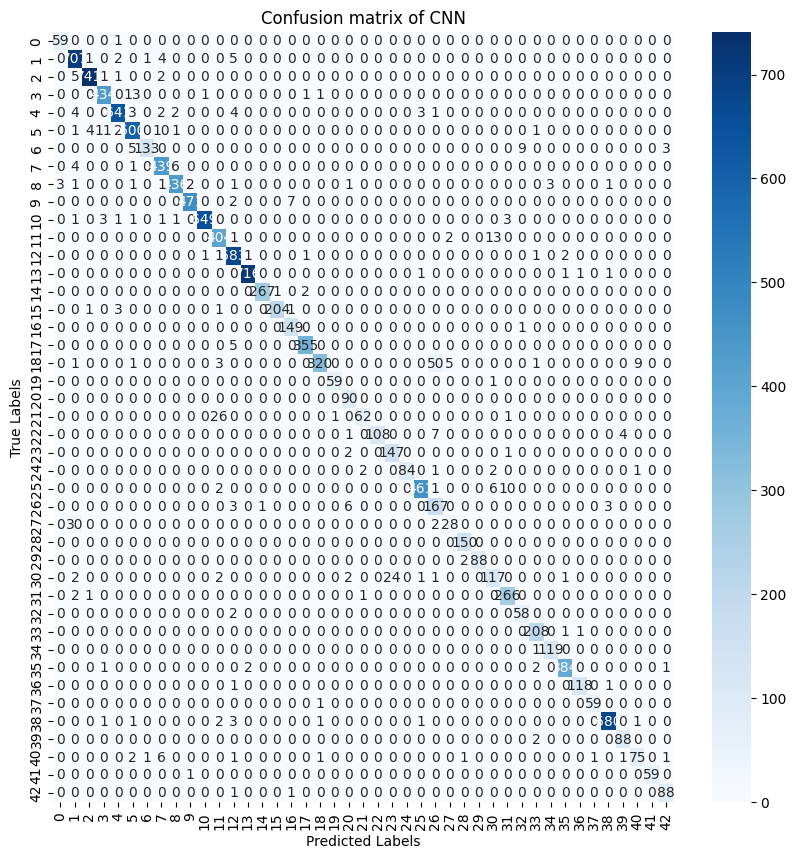

In [19]:
import seaborn as sns
classes=list(range(0,43))
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix of CNN')
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(labels, classes_x))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.93      0.98      0.96       720
           2       0.99      0.99      0.99       750
           3       0.96      0.96      0.96       450
           4       0.98      0.97      0.98       660
           5       0.96      0.95      0.95       630
           6       0.99      0.89      0.93       150
           7       0.94      0.98      0.96       450
           8       0.98      0.97      0.97       450
           9       0.99      0.98      0.99       480
          10       1.00      0.98      0.99       660
          11       0.92      0.96      0.94       420
          12       0.96      0.99      0.97       690
          13       1.00      0.99      1.00       720
          14       1.00      0.99      0.99       270
          15       1.00      0.97      0.98       210
          16       0.94      0.99      0.97       150
          17       0.99    

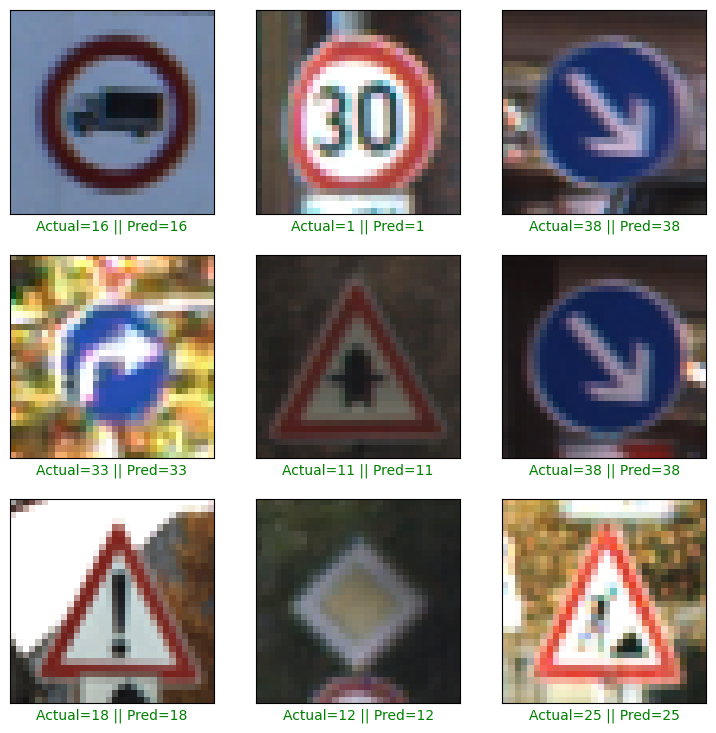

In [21]:
plt.figure(figsize = (9, 9))

start_index = 0
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [22]:
# Define the architecture of AlexNet
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

# Create a Sequential model
AlexNet = Sequential()

# Add the 1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(5,5), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Add the 2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten the input
AlexNet.add(Flatten())

# Add the 1st Fully Connected Layer
AlexNet.add(Dense(1024, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 2nd Fully Connected Layer
AlexNet.add(Dense(1024))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the Output layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Print the model summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 8, 96)          7296      
                                                                 
 batch_normalization (Batch  (None, 8, 8, 96)          384       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Bat  (None, 4, 4, 256)        

In [23]:
# Compile the AlexNet model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
eps = 20
history = AlexNet.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/20
981/981 [==============================] - 16s 13ms/step - loss: 2.1726 - accuracy: 0.4577 - val_loss: 1.4072 - val_accuracy: 0.6728
Epoch 2/20
981/981 [==============================] - 10s 10ms/step - loss: 1.0452 - accuracy: 0.7570 - val_loss: 0.6160 - val_accuracy: 0.8752
Epoch 3/20
981/981 [==============================] - 12s 12ms/step - loss: 0.7099 - accuracy: 0.8400 - val_loss: 0.4178 - val_accuracy: 0.8981
Epoch 4/20
981/981 [==============================] - 12s 12ms/step - loss: 0.5330 - accuracy: 0.8841 - val_loss: 0.3406 - val_accuracy: 0.9189
Epoch 5/20
981/981 [==============================] - 10s 10ms/step - loss: 0.4113 - accuracy: 0.9145 - val_loss: 0.2837 - val_accuracy: 0.9370
Epoch 6/20
981/981 [==============================] - 11s 12ms/step - loss: 0.3352 - accuracy: 0.9334 - val_loss: 0.2961 - val_accuracy: 0.9322
Epoch 7/20
981/981 [==============================] - 11s 12ms/step - loss: 0.2805 - accuracy: 0.9441 - val_loss: 0.3059 - val_accuracy:

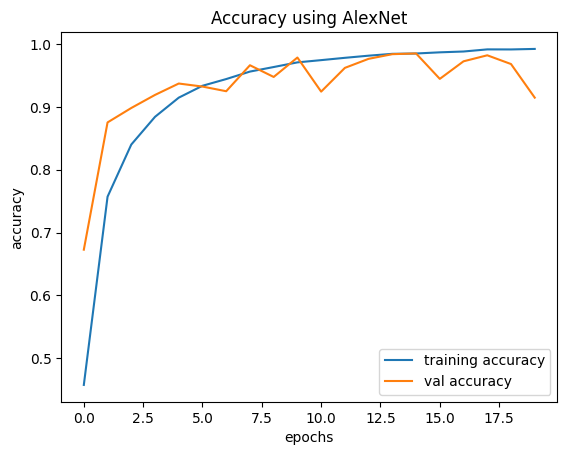

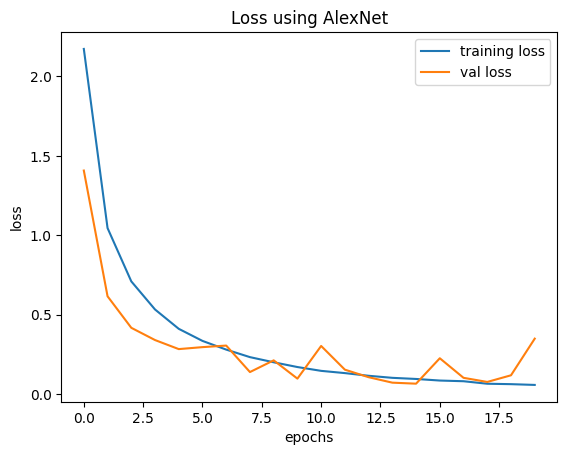

In [25]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy using AlexNet')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss using AlexNet')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
predict_x1=AlexNet.predict(X_test)
classes_x1=np.argmax(predict_x1,axis=1)

395/395 [==============================] - 2s 5ms/step


In [27]:
accuracy2=accuracy_score(labels,classes_x1)*100
print("Accuracy score of testing data using AlexNet is ",accuracy2)

Accuracy score of testing data using AlexNet is  77.32383214568488


In [28]:
from sklearn.metrics import classification_report

print(classification_report(labels, classes_x1))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26        60
           1       0.44      0.97      0.61       720
           2       0.96      0.70      0.81       750
           3       0.82      0.80      0.81       450
           4       0.98      0.62      0.76       660
           5       0.95      0.56      0.70       630
           6       0.94      0.70      0.80       150
           7       0.92      0.55      0.69       450
           8       0.46      0.96      0.62       450
           9       0.88      0.88      0.88       480
          10       0.99      0.91      0.95       660
          11       0.63      0.97      0.76       420
          12       0.99      0.86      0.92       690
          13       1.00      0.98      0.99       720
          14       0.70      1.00      0.83       270
          15       0.97      0.74      0.84       210
          16       1.00      0.88      0.94       150
          17       1.00    

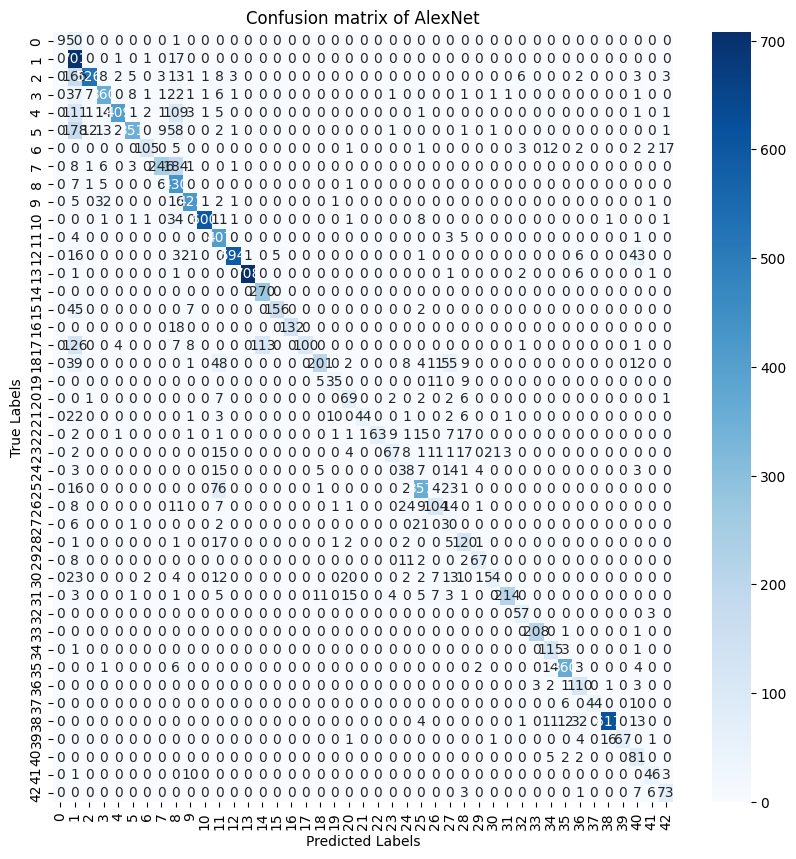

In [29]:
cf1=confusion_matrix(labels,classes_x1)
classes=list(range(0,43))
df_cm = pd.DataFrame(cf1, index = classes,  columns = classes)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix of AlexNet')
plt.show()

In [30]:
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras as K

# Load the pre-trained ResNet50 model without the top classification layer
res = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Create a sequential model
model = K.models.Sequential()

# Add the ResNet50 base model to the sequential model
model.add(res)

# Flatten the output from the ResNet50 base model
model.add(K.layers.Flatten())

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 256 units and ReLU activation function
model.add(K.layers.Dense(256, activation='relu'))

# Add dropout layer with a rate of 0.5 to prevent overfitting
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 128 units and ReLU activation function
model.add(K.layers.Dense(128, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 64 units and ReLU activation function
model.add(K.layers.Dense(64, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add the output layer with 43 units and softmax activation function for multi-class classification
model.add(K.layers.Dense(43, activation='softmax'))

# Print the summary of the model
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_8 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 256)               

In [31]:
from tensorflow.keras.optimizers import Adam
# Compile the Resnet50 model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [34]:
eps = 50
history = model.fit(X_train, y_train, batch_size=500, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 22s 283ms/step - loss: 0.5643 - accuracy: 0.7911 - val_loss: 0.4617 - val_accuracy: 0.7993
Epoch 2/50
63/63 [==============================] - 14s 216ms/step - loss: 0.5185 - accuracy: 0.8038 - val_loss: 0.4410 - val_accuracy: 0.8078
Epoch 3/50
63/63 [==============================] - 14s 224ms/step - loss: 0.4933 - accuracy: 0.8140 - val_loss: 0.4255 - val_accuracy: 0.8222
Epoch 4/50
63/63 [==============================] - 14s 219ms/step - loss: 0.4808 - accuracy: 0.8191 - val_loss: 0.4149 - val_accuracy: 0.8336
Epoch 5/50
63/63 [==============================] - 14s 216ms/step - loss: 0.4655 - accuracy: 0.8274 - val_loss: 0.3982 - val_accuracy: 0.8395
Epoch 6/50
63/63 [==============================] - 14s 216ms/step - loss: 0.4531 - accuracy: 0.8289 - val_loss: 0.3873 - val_accuracy: 0.8463
Epoch 7/50
63/63 [==============================] - 14s 219ms/step - loss: 0.4382 - accuracy: 0.8360 - val_loss: 0.3719 - val_accuracy: 0.8558

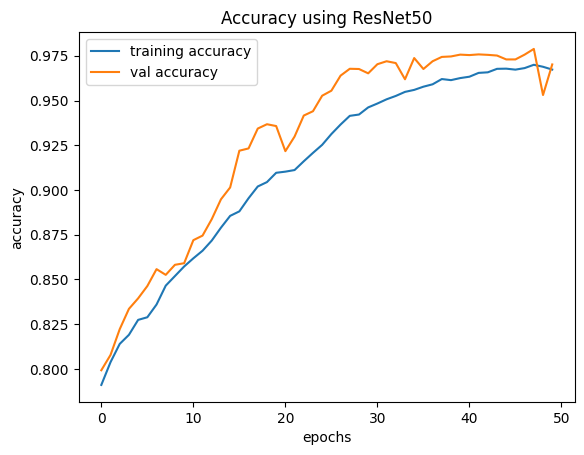

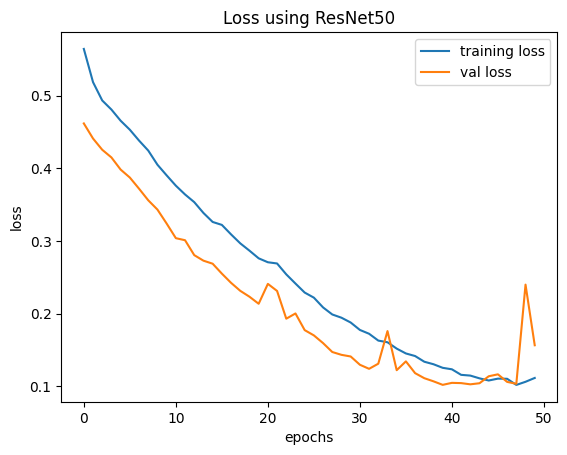

In [35]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy using ResNet50')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss using ResNet50')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
predict_x2=model.predict(X_test)
classes_x2=np.argmax(predict_x2,axis=1)

395/395 [==============================] - 6s 13ms/step


In [37]:
accuracy3=accuracy_score(labels,classes_x2)*100
print("Accuracy score of testing data using ResNet50 is ",accuracy3)

Accuracy score of testing data using ResNet50 is  91.16389548693587


In [38]:
from sklearn.metrics import classification_report

print(classification_report(labels, classes_x2))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73        60
           1       0.93      0.90      0.92       720
           2       0.89      0.99      0.93       750
           3       0.92      0.96      0.94       450
           4       0.97      0.93      0.95       660
           5       0.86      0.92      0.89       630
           6       0.98      0.79      0.88       150
           7       0.97      0.91      0.94       450
           8       0.89      0.83      0.86       450
           9       0.94      1.00      0.97       480
          10       0.99      0.97      0.98       660
          11       0.97      0.91      0.94       420
          12       0.96      0.98      0.97       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       0.96      0.99      0.97       150
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


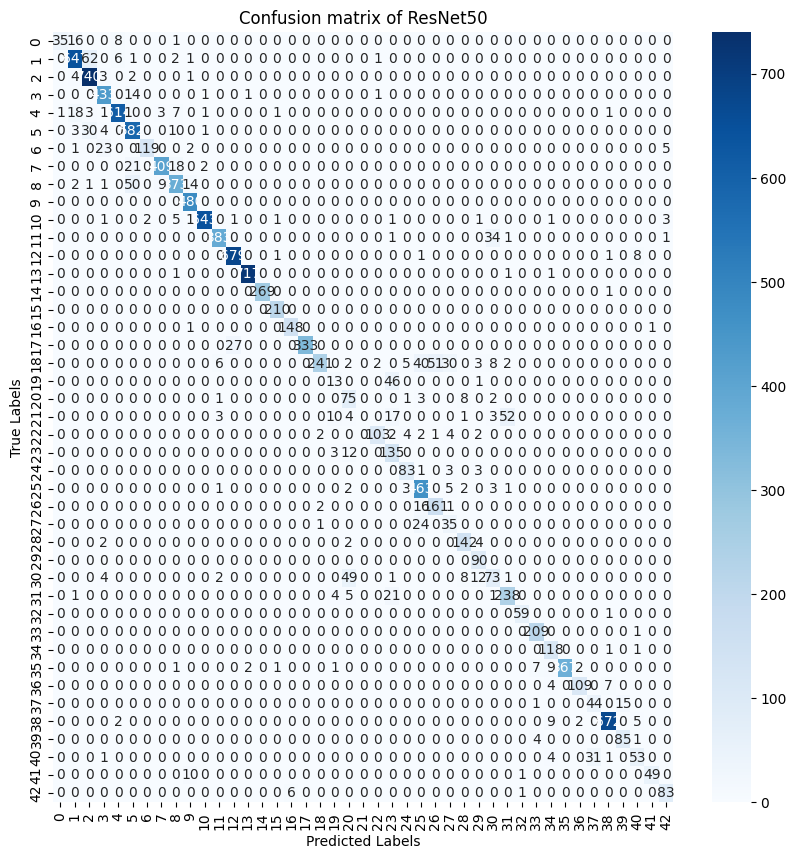

In [39]:
cf2=confusion_matrix(labels,classes_x2)
classes=list(range(0,43))
df_cm = pd.DataFrame(cf2, index = classes,  columns = classes)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix of ResNet50')
plt.show()

In [40]:
# Building VGGNet model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Create a sequential model
model = Sequential()

# Add the first convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(input_shape=(32, 32, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the second convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the first max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Continue adding more convolutional and max pooling layers with increasing number of filters
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the previous layers
model.add(Flatten())

# Add two fully connected layers with 4096 units and ReLU activation
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))

# Add the output layer with 43 units and softmax activation for multi-class classification
model.add(Dense(units=43, activation="softmax"))

# Print the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [41]:
# Compile the model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [43]:
eps = 50
history = model.fit(X_train, y_train, batch_size=500, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 26s 308ms/step - loss: 3.4868 - accuracy: 0.0723 - val_loss: 3.4326 - val_accuracy: 0.0736
Epoch 2/50
63/63 [==============================] - 12s 194ms/step - loss: 3.4000 - accuracy: 0.1054 - val_loss: 3.3096 - val_accuracy: 0.1317
Epoch 3/50
63/63 [==============================] - 12s 191ms/step - loss: 3.2993 - accuracy: 0.1460 - val_loss: 3.3646 - val_accuracy: 0.1247
Epoch 4/50
63/63 [==============================] - 12s 197ms/step - loss: 3.0043 - accuracy: 0.2139 - val_loss: 2.7562 - val_accuracy: 0.3213
Epoch 5/50
63/63 [==============================] - 12s 191ms/step - loss: 2.6023 - accuracy: 0.3078 - val_loss: 2.2918 - val_accuracy: 0.3604
Epoch 6/50
63/63 [==============================] - 12s 193ms/step - loss: 2.1638 - accuracy: 0.4054 - val_loss: 1.7786 - val_accuracy: 0.5250
Epoch 7/50
63/63 [==============================] - 12s 194ms/step - loss: 1.6913 - accuracy: 0.5292 - val_loss: 1.4138 - val_accuracy: 0.5973

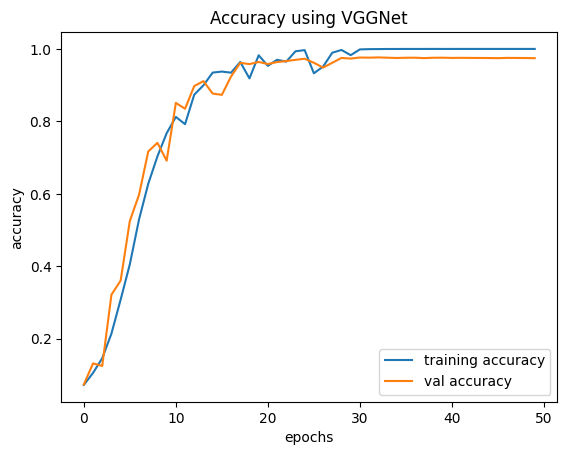

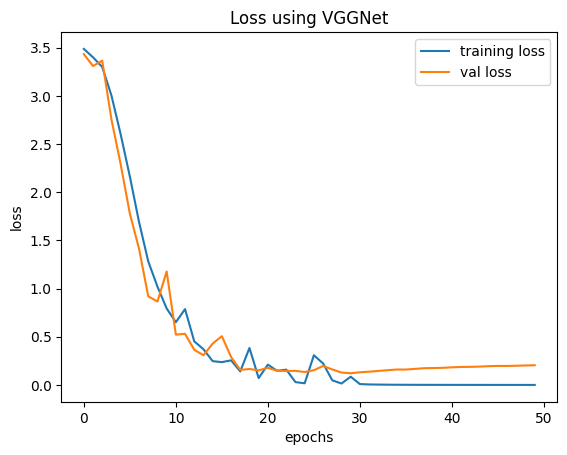

In [44]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy using VGGNet')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss using VGGNet')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
predict_x3=model.predict(X_test)
classes_x3=np.argmax(predict_x3,axis=1)

395/395 [==============================] - 3s 8ms/step


In [48]:
accuracy4=accuracy_score(labels,classes_x3)*100
print("Accuracy score of testing data using VGGNet is ",accuracy4)

Accuracy score of testing data using VGGNet is  84.06175771971498


In [49]:
print(classification_report(labels, classes_x3))

              precision    recall  f1-score   support

           0       0.17      0.02      0.03        60
           1       0.83      0.90      0.86       720
           2       0.81      0.88      0.84       750
           3       0.77      0.85      0.81       450
           4       0.82      0.83      0.82       660
           5       0.76      0.80      0.78       630
           6       0.94      0.55      0.69       150
           7       0.87      0.78      0.83       450
           8       0.75      0.79      0.77       450
           9       0.89      0.89      0.89       480
          10       0.96      0.94      0.95       660
          11       0.83      0.86      0.85       420
          12       0.92      0.91      0.91       690
          13       0.97      0.98      0.97       720
          14       1.00      0.99      0.99       270
          15       0.81      0.75      0.78       210
          16       0.95      0.96      0.95       150
          17       0.96    

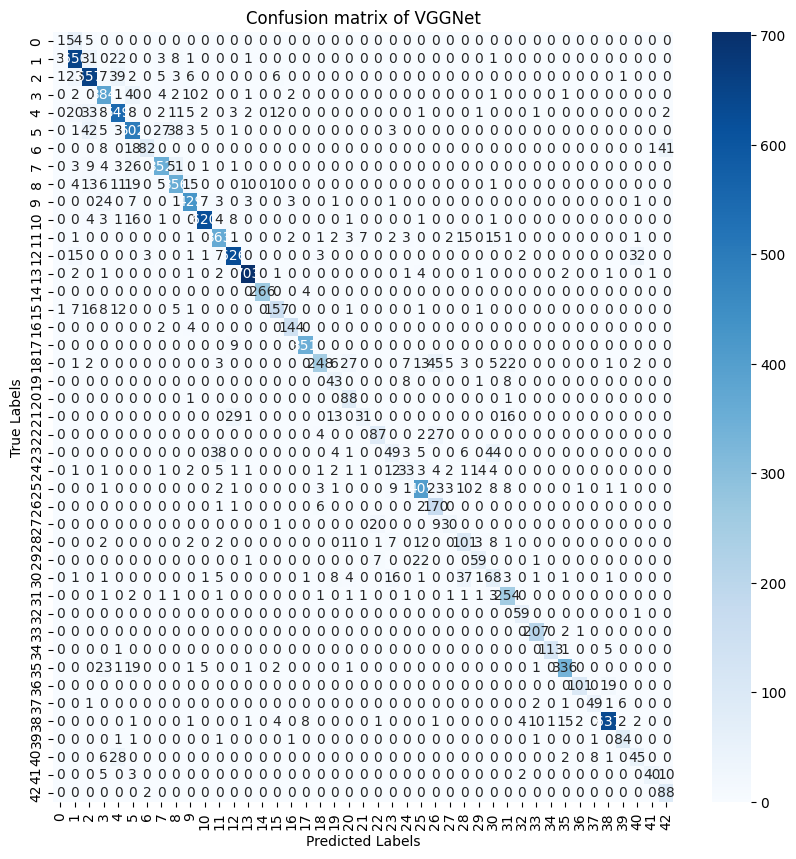

In [50]:
cf3=confusion_matrix(labels,classes_x3)
classes=list(range(0,43))
df_cm = pd.DataFrame(cf3, index = classes,  columns = classes)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix of VGGNet')
plt.show()

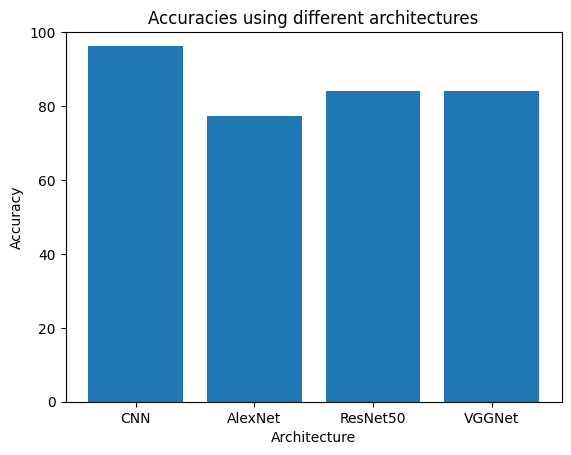

In [51]:
models=['CNN','AlexNet','ResNet50','VGGNet']
accuracies=[accuracy1,accuracy2,accuracy3,accuracy4]
plt.bar(models,accuracies)
plt.ylim(0,100)
plt.title('Accuracies using different architectures')
plt.xlabel('Architecture')
plt.ylabel('Accuracy')
plt.show()